# Unit Tests

## Setup

In [1]:
BUILD_DIR="../build/"
!echo $BUILD_DIR

PYTHON_SCRIPT_DIR="../scripts/python/landmark_tools/"
!echo $PYTHON_SCRIPT_DIR

!rm -r output
!mkdir output

../build/
../scripts/python/landmark_tools/


In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

# This sys call is needed because the file is in another directory 
import sys
sys.path.insert(1, '../scripts/python/landmark_tools')
import visualize_corr
import landmark

plt.rcParams['figure.figsize'] = [8, 3]

In [3]:
#!wget https://pgda.gsfc.nasa.gov/data/LOLA_5mpp/Haworth/Haworth_final_adj_5mpp_surf.tif 

In [4]:
!$BUILD_DIR/create_landmark \
    -geotif_file Haworth_final_adj_5mpp_surf.tif \
    -lmk_file output/Haworth_final_adj_5mpp_surf_tif.lmk \
    -lmk_width_meters 10000 \
    -lmk_height_meters 10000 \
    -lmk_res 10 \
    -lmk_center_lat -86.8 \
    -lmk_center_long 338.0

Polar Stereographic Projection Detected
Creating landmark with empty surface reflectance map.
 0.374606593416661  0.927183854566485  0.000000000000000
 0.925738159047660 -0.374022494511561  0.055821451811993
 0.051756748858541 -0.020911083902863 -0.998440767155269


In [5]:
!$BUILD_DIR/landmark_2_point \
-landmark output/Haworth_final_adj_5mpp_surf_tif.lmk \
-ply output/Haworth_final_adj_5mpp_surf_tif.ply \
-frame LOCAL

!python $PYTHON_SCRIPT_DIR/render_ply.py \
    output/Haworth_final_adj_5mpp_surf_tif.ply \
    30 120 \
    output/Haworth_final_adj_5mpp_surf_tif.png \
    -height 1000 \
    -width 1000 \
    -resolution 10

!$BUILD_DIR/add_srm \
  -input output/Haworth_final_adj_5mpp_surf_tif.lmk \
  -output output/Haworth_final_adj_5mpp_surf_tif_rendered.lmk \
  -srm output/Haworth_final_adj_5mpp_surf_tif.png

                 #! LVS Map v3.0
Landmark file saved at output/Haworth_final_adj_5mpp_surf_tif.ply
PLY import of 'Haworth_final_adj_5mpp_surf_tif.ply' took 228.82 ms
Fra:1 Mem:105.19M (Peak 105.19M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Synchronizing object | Haworth_final_adj_5mpp_surf_tif
Fra:1 Mem:259.47M (Peak 274.73M) | Time:00:00.03 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Initializing
Fra:1 Mem:259.33M (Peak 274.73M) | Time:00:00.03 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Waiting for render to start
Fra:1 Mem:259.33M (Peak 274.73M) | Time:00:00.03 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Loading render kernels (may take a few minutes the first time)
Fra:1 Mem:259.33M (Peak 274.73M) | Time:00:00.03 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Scene
Fra:1 Mem:259.33M (Peak 274.73M) | Time:00:00.03 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Shaders
Fra:1 Mem:259.42M (Peak 274.73M) | Time:00:00.03 | Mem:0.00M, Peak:0.00M | Scen

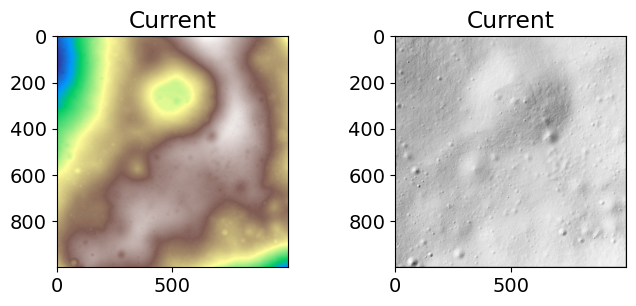

In [6]:
gt = landmark.Landmark("output/Haworth_final_adj_5mpp_surf_tif_rendered.lmk")
plt.subplot(1,2,1)
plt.imshow(gt.ele, cmap='terrain')
plt.title("Current")

plt.subplot(1,2,2)
plt.imshow(gt.srm, cmap='gray')
plt.title("Current")

plt.show()


## Translate

In [7]:
!$BUILD_DIR/distort_landmark -input output/Haworth_final_adj_5mpp_surf_tif_rendered.lmk \
  -output output/translate_test1.lmk \
  -translate 20 30 50

!$BUILD_DIR/distort_landmark -input output/translate_test1.lmk \
  -output output/translate_test2.lmk \
  -translate -20 -30 -50

                 #! LVS Map v3.0
Translating landmark by (20.000000, 30.000000, 50.000000)...done.
Landmark file written to: output/translate_test1.lmk
                 #! LVS Map v3.0
Translating landmark by (-20.000000, -30.000000, -50.000000)...done.
Landmark file written to: output/translate_test2.lmk


After first translation, the anchor points should be different

In [8]:
L1 = landmark.Landmark("output/translate_test1.lmk")
L1.assess_equality(gt)

self.anchor_point != other.anchor_point


After second transation, the anchor points should be the same

In [9]:
L2 = landmark.Landmark("output/translate_test2.lmk")
L2.assess_equality(gt)

## Rotation

In [10]:
!$BUILD_DIR/distort_landmark -input output/Haworth_final_adj_5mpp_surf_tif_rendered.lmk  \
  -output output/rotate_test1.lmk \
  -rotate 15

!$BUILD_DIR/distort_landmark -input output/rotate_test1.lmk \
  -output output/rotate_test2.lmk \
  -rotate -15

!$BUILD_DIR/distort_landmark -input output/Haworth_final_adj_5mpp_surf_tif_rendered.lmk  \
  -output output/rotate_test2_degrees.lmk \
  -rotate 2

                 #! LVS Map v3.0
Rotating landmark in plane by 15.000000 degrees...done.
Landmark file written to: output/rotate_test1.lmk
                 #! LVS Map v3.0
Rotating landmark in plane by -15.000000 degrees...done.
Landmark file written to: output/rotate_test2.lmk
                 #! LVS Map v3.0
Rotating landmark in plane by 2.000000 degrees...done.
Landmark file written to: output/rotate_test2_degrees.lmk


In [11]:
L1 = landmark.Landmark("output/rotate_test1.lmk")
L1.assess_equality(gt)

self.mapRworld != other.mapRworld


In [12]:
L2 = landmark.Landmark("output/rotate_test2.lmk")
L2.assess_equality(gt)

## Random Displacement

In [13]:
!$BUILD_DIR/distort_landmark \
  -input output/Haworth_final_adj_5mpp_surf_tif_rendered.lmk \
  -output output/random_test1.lmk \
  -random_displace 0 10

                 #! LVS Map v3.0
Applying random displacement to landmark with mu=0.000000, sigma=10.000000 ...done.
Landmark file written to: output/random_test1.lmk


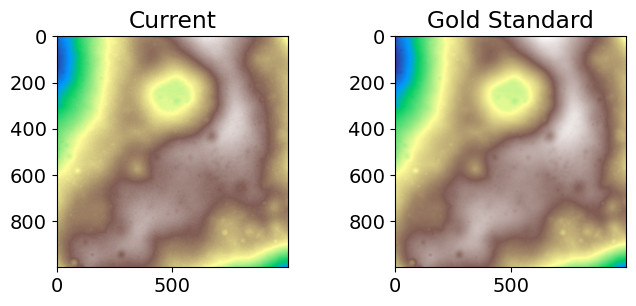

<Figure size 800x300 with 0 Axes>

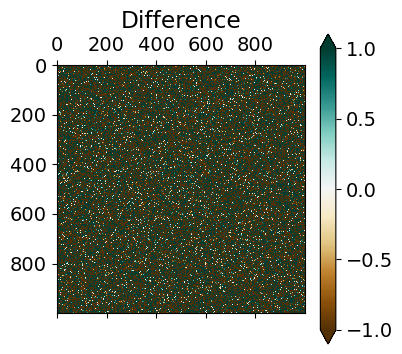

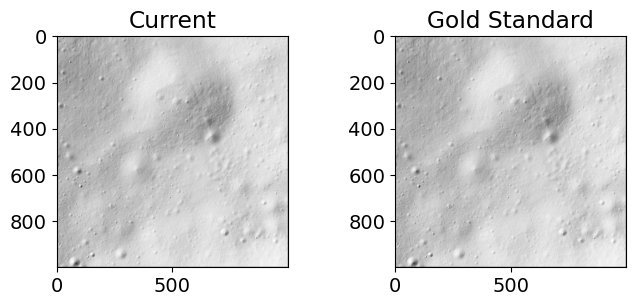

<Figure size 800x300 with 0 Axes>

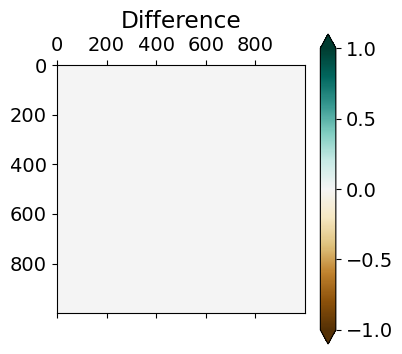

In [14]:
L1 = landmark.Landmark("output/random_test1.lmk")
plt.subplot(1,2,1)
plt.imshow(L1.ele, cmap='terrain')
plt.title("Current")

plt.subplot(1,2,2)
plt.imshow(gt.ele, cmap='terrain')
plt.title("Gold Standard")

plt.show()

fig = plt.figure()
cax = plt.matshow(L1.ele-gt.ele, cmap='BrBG', vmin=-1, vmax=1)
cbar = fig.colorbar(cax, extend='both')
plt.title("Difference")
plt.show()

plt.subplot(1,2,1)
plt.imshow(L1.srm, cmap='gray')
plt.title("Current")

plt.subplot(1,2,2)
plt.imshow(gt.srm, cmap='gray')
plt.title("Gold Standard")

plt.show()

fig = plt.figure()
cax = plt.matshow(L1.srm-gt.srm, cmap='BrBG', vmin=-1, vmax=1)
cbar = fig.colorbar(cax, extend='both')
plt.title("Difference")
plt.show()

## Sine Wave Displacement

In [18]:
!$BUILD_DIR/distort_landmark \
  -input output/Haworth_final_adj_5mpp_surf_tif_rendered.lmk \
  -output output/sine_test1.lmk \
  -sine_wave 10 0.05 45

                 #! LVS Map v3.0
Applying sine displacement to landmark: z(x,y) = 10.000000sin(2PI*0.050000x*cos(45.000000) +y*cos(45.000000))...done.
Landmark file written to: output/sine_test1.lmk


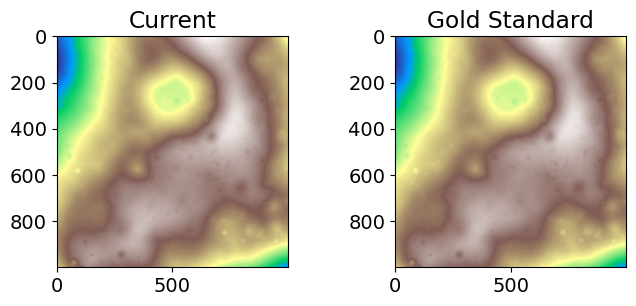

<Figure size 800x300 with 0 Axes>

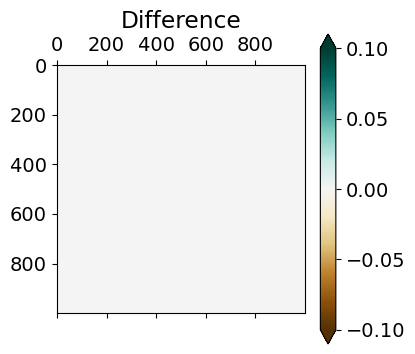

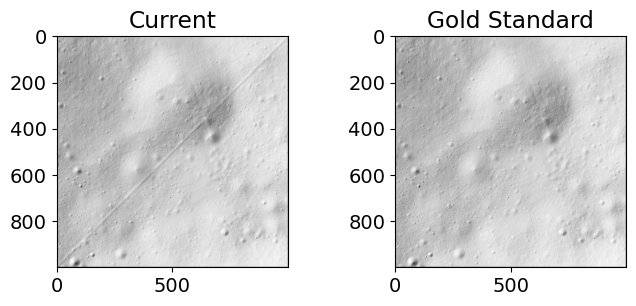

<Figure size 800x300 with 0 Axes>

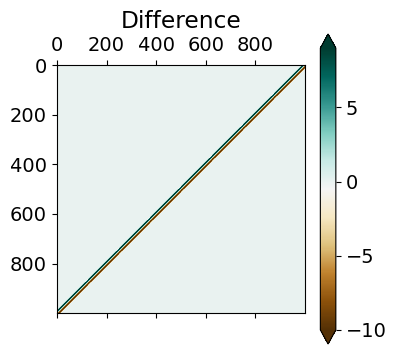

In [19]:
L1 = landmark.Landmark("output/sine_test1.lmk")
plt.subplot(1,2,1)
plt.imshow(L1.ele, cmap='terrain')
plt.title("Current")

plt.subplot(1,2,2)
plt.imshow(gt.ele, cmap='terrain')
plt.title("Gold Standard")

plt.show()

fig = plt.figure()
cax = plt.matshow(L1.ele-gt.ele, cmap='BrBG')
cbar = fig.colorbar(cax, extend='both')
plt.title("Difference")
plt.show()

plt.subplot(1,2,1)
plt.imshow(L1.srm, cmap='gray')
plt.title("Current")

plt.subplot(1,2,2)
plt.imshow(gt.srm, cmap='gray')
plt.title("Gold Standard")

plt.show()

fig = plt.figure()
cax = plt.matshow(L1.srm-gt.srm, cmap='BrBG')
cbar = fig.colorbar(cax, extend='both')
plt.title("Difference")
plt.show()

## Registration

If we move the lmk anchor point in header, can we reregister the landmark to the original and find the original anchor point?

In [20]:
!$BUILD_DIR/landmark_registration \
    -child output/translate_test1.lmk \
    -base output/Haworth_final_adj_5mpp_surf_tif_rendered.lmk

No parameter file provided. Using defaults.
feature_match: 
  correlation_window_size: 25
  search_window_size: 36
  min_correlation: 0.300000
forstner_feature_detector: 
  min_dist_feature: 5.000000
  num_features: 600
  forstner_feature_window_size: 9
                 #! LVS Map v3.0
                 #! LVS Map v3.0
At feature i = 744 done length 9801
best feat for homography 583
# of RANSAC inliers 583
iter = 0
iter = 1
iter = 2
iter = 3
iter = 4
iter = 5
iter = 6
iter = 7
iter = 8
iter = 9
iter = 10
iter = 11
iter = 12
iter = 13
iter = 14
iter = 15
iter = 16
iter = 17
iter = 18
iter = 19
iter = 20
iter = 21
iter = 22
iter = 23
iter = 24
iter = 25
iter = 26
iter = 27
iter = 28
iter = 29
bestk 583
-38.4256031266413629 -6.3437324726401130 48.2185387578792870
 0.999999999999344 -0.000001103261108 -0.000000307467931
 0.000001103261117  0.999999999999391  0.000000027278997
 0.000000307467901 -0.000000027279336  0.999999999999952
 0.999999999999344 -0.000001103261108 -0.000000307467931
 0

In [21]:
L1 = landmark.Landmark("output/translate_test1.lmk_registered.lmk")
L1.assess_equality(gt)

print(L1)
print(gt)

self.mapRworld != other.mapRworld
LMK_BODY 1
LMK_ID b'0\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
LMK_SIZE 1000 1000
LMK_RESOLUTION 10.0
LMK_ANCHOR_POINT 90014.89695744164 -36368.393166083086 -1736479.6709528868
LMK_ANCHOR_PIXEL 500.0 500.0
LMK_WORLD_2_MAP_ROT 0.37460557049052806 0.9271842678548088 8.988654279849757e-08
LMK_WORLD_2_MAP_ROT 0.9257385545282188 -0.3740214716576644 0.055821746649844094
LMK_WORLD_2_MAP_ROT 0.05175707891740931 -0.020911054038104417 -0.9984407506712415

LMK_BODY 1
LMK_ID b'0\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
LMK_SIZE 1000 1000
LMK_RESOLUTION 10.0
LMK_ANCHOR_POINT 90014.89640300615 -36368.37886264924 -1736479.670777188
LMK_ANCHOR_PIXEL 500.0 500.0
LMK_WORLD_2_MAP_ROT 0.3746065934166607 0.927183854566485 0.0
LMK_WORLD_2_MAP_ROT 0.9257381590476602 -0.37402249451156055 0.05582145181199273
LMK

## Landmark Comparison

What if a map is compared to itself? Should be zero deltas.

In [22]:
!$BUILD_DIR/landmark_comparison \
  -l2 output/Haworth_final_adj_5mpp_surf_tif_rendered.lmk \
  -l1 output/Haworth_final_adj_5mpp_surf_tif_rendered.lmk \
  -o output/self_compare

No parameter file provided. Using defaults.
feature_match: 
  correlation_window_size: 25
  search_window_size: 36
  min_correlation: 0.300000
forstner_feature_detector: 
  min_dist_feature: 5.000000
  num_features: 600
  forstner_feature_window_size: 9
                 #! LVS Map v3.0
                 #! LVS Map v3.0
line = 0
num_matched_features 2213
i = 0 j = 0
best feat for homography 2213
num_matched_features 2397
i = 0 j = 200
best feat for homography 2397
num_matched_features 2397
i = 0 j = 400
best feat for homography 2397
num_matched_features 2397
i = 0 j = 600
best feat for homography 2397
num_matched_features 2209
i = 0 j = 800
best feat for homography 2209
line = 200
num_matched_features 2397
i = 200 j = 0
best feat for homography 2397
num_matched_features 2601
i = 200 j = 200
best feat for homography 2601
num_matched_features 2601
i = 200 j = 400
best feat for homography 2601
num_matched_features 2601
i = 200 j = 600
best feat for homography 2601
num_matched_features 2397


/Users/cmauceri/Workspace/LanderVisionSystem/github_landmark_tools/tests/../scripts/python/landmark_tools/visualize_corr.py:155: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


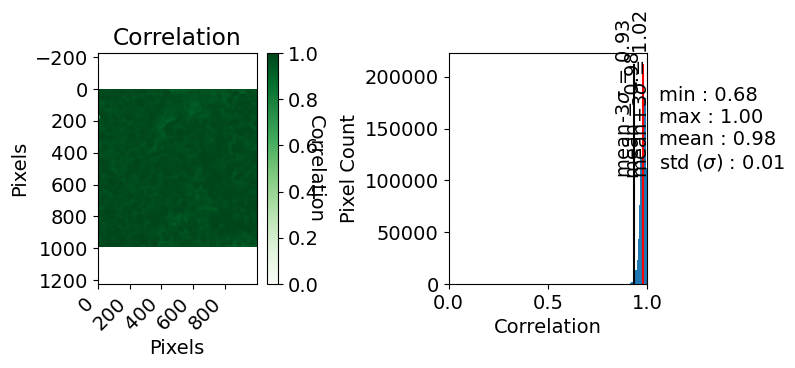

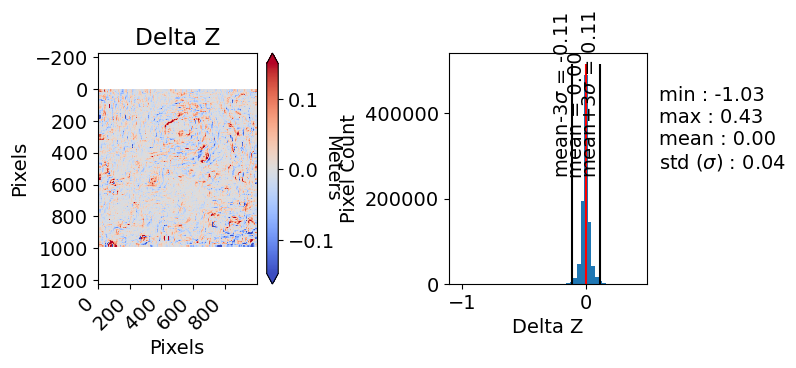

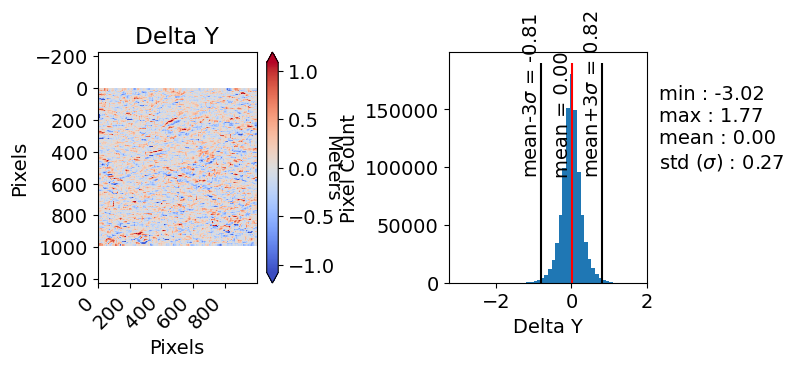

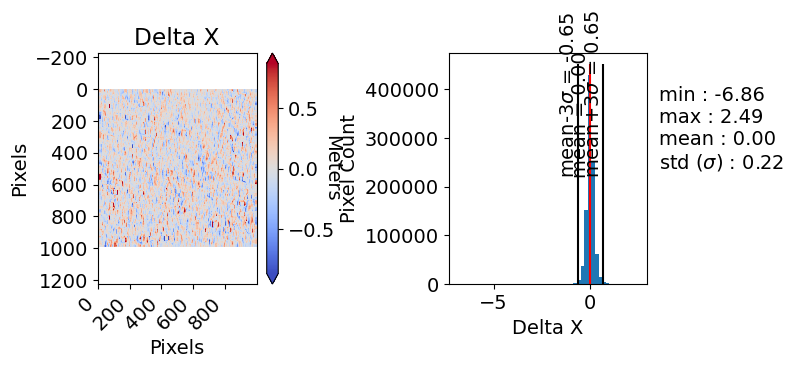

In [23]:
width = 1000
height = 1000
visualize_corr.displayAll("output/self_compare", width, height, "output/self_compare_")

## Crop 

Cropping a landmark will change the elevation values because the anchor point changes, but the structure should remain the same.

If we start with two rough crops, and then refine, we should end with the same map

In [24]:
!$BUILD_DIR/edit_landmark -input output/Haworth_final_adj_5mpp_surf_tif_rendered.lmk -output output/Haworth_final_adj_5mpp_surf_tif_rendered_cropped1.lmk -operation CROP -roi 150 150 200 200
!$BUILD_DIR/edit_landmark -input output/Haworth_final_adj_5mpp_surf_tif_rendered.lmk -output output/Haworth_final_adj_5mpp_surf_tif_rendered_cropped_rough.lmk -operation CROP -roi 50 50 400 400
!$BUILD_DIR/edit_landmark -input output/Haworth_final_adj_5mpp_surf_tif_rendered_cropped_rough.lmk -output output/Haworth_final_adj_5mpp_surf_tif_rendered_cropped2.lmk -operation CROP -roi 100 100 200 200

                 #! LVS Map v3.0
 0.397761458539497  0.917488867562180  0.000000000000000
 0.915982766332511 -0.397108514351337  0.057274772906703
 0.052548966534052 -0.022781697208889 -0.998358452855729
Landmark file written to: output/Haworth_final_adj_5mpp_surf_tif_rendered_cropped1.lmk
                 #! LVS Map v3.0
 0.397761458539497  0.917488867562180  0.000000000000000
 0.915982766332511 -0.397108514351337  0.057274772906703
 0.052548966534052 -0.022781697208889 -0.998358452855729
Landmark file written to: output/Haworth_final_adj_5mpp_surf_tif_rendered_cropped_rough.lmk
                 #! LVS Map v3.0
 0.397765322844753  0.917487192249685  0.000000000000000
 0.915981080440467 -0.397112366537147  0.057275026131656
 0.052549102911560 -0.022782019260200 -0.998358438328448
Landmark file written to: output/Haworth_final_adj_5mpp_surf_tif_rendered_cropped2.lmk


In [25]:
L_org = landmark.Landmark("output/Haworth_final_adj_5mpp_surf_tif_rendered.lmk")
L_crop1 = landmark.Landmark("output/Haworth_final_adj_5mpp_surf_tif_rendered_cropped1.lmk")
L_crop2 = landmark.Landmark("output/Haworth_final_adj_5mpp_surf_tif_rendered_cropped2.lmk")

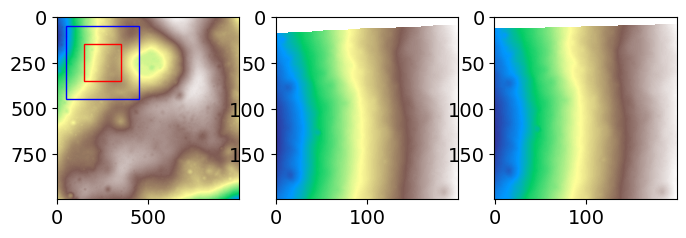

In [26]:
ax = plt.subplot(1,3,1)

# Display the image
ax.imshow(L_org.ele , cmap='terrain')

# Create a Rectangle patch
rect = patches.Rectangle((150, 150), 200, 200, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

rect = patches.Rectangle((50, 50), 400, 400, linewidth=1, edgecolor='b', facecolor='none')
ax.add_patch(rect)

plt.subplot(1,3,2)
plt.imshow(L_crop2.ele, cmap='terrain')

plt.subplot(1,3,3)
plt.imshow(L_crop1.ele, cmap='terrain')

plt.show()

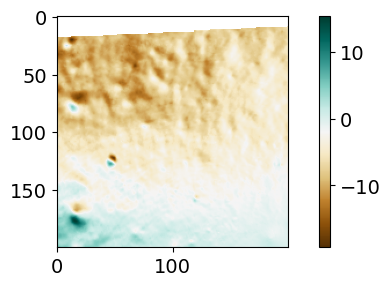

In [27]:
plt.figure()
plt.imshow(L_crop1.ele-L_crop2.ele, cmap='BrBG')
plt.colorbar()
plt.show()

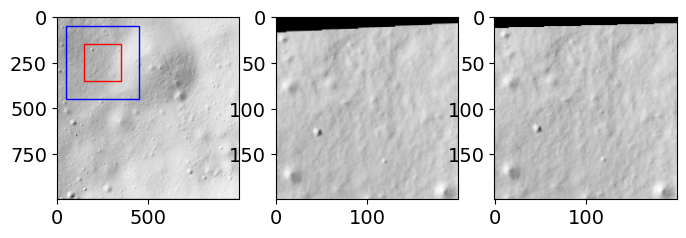

In [28]:
ax = plt.subplot(1,3,1)

# Display the image
ax.imshow(L_org.srm , cmap='gray')

# Create a Rectangle patch
rect = patches.Rectangle((150, 150), 200, 200, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

rect = patches.Rectangle((50, 50), 400, 400, linewidth=1, edgecolor='b', facecolor='none')
ax.add_patch(rect)

plt.subplot(1,3,2)
plt.imshow(L_crop2.srm, cmap='gray')

plt.subplot(1,3,3)
plt.imshow(L_crop1.srm, cmap='gray')

plt.show()

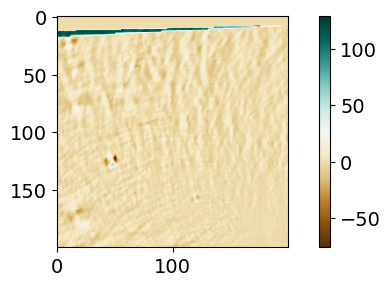

In [29]:
plt.figure()
plt.imshow(L_crop1.srm-L_crop2.srm, cmap='BrBG')
plt.colorbar()
plt.show()

## Subset 

Subsetting a landmark will not change the elevation values.

In [30]:
!$BUILD_DIR/edit_landmark -input output/Haworth_final_adj_5mpp_surf_tif_rendered.lmk -output output/Haworth_final_adj_5mpp_surf_tif_rendered_subset.lmk -operation SUBSET -roi 50 50 200 200

                 #! LVS Map v3.0
Landmark file written to: output/Haworth_final_adj_5mpp_surf_tif_rendered_subset.lmk


In [31]:
L_subset = landmark.Landmark("output/Haworth_final_adj_5mpp_surf_tif_rendered_subset.lmk")

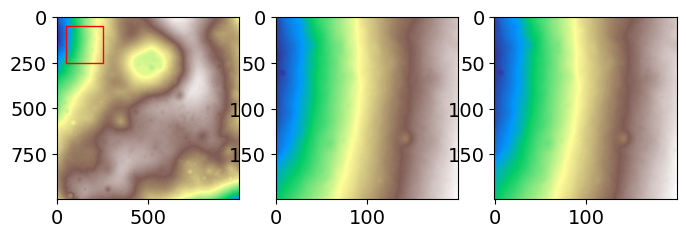

In [32]:
ax = plt.subplot(1,3,1)

# Display the image
ax.imshow(L_org.ele , cmap='terrain')

# Create a Rectangle patch
rect = patches.Rectangle((50, 50), 200, 200, linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.subplot(1,3,2)
plt.imshow(L_org.ele[50:250,50:250], cmap='terrain')

plt.subplot(1,3,3)
plt.imshow(L_subset.ele, cmap='terrain')

plt.show()

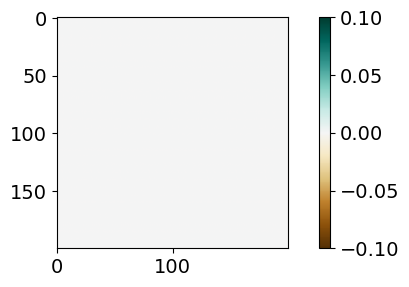

In [33]:
plt.figure()
plt.imshow(L_org.ele[50:250,50:250]-L_subset.ele, cmap='BrBG')
plt.colorbar()
plt.show()

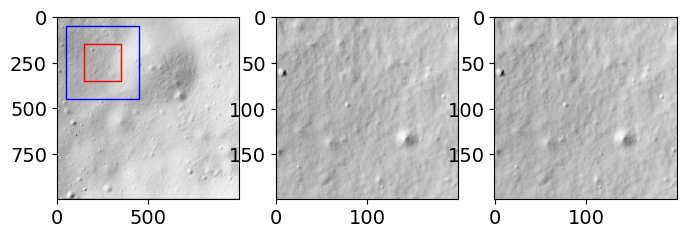

In [34]:
ax = plt.subplot(1,3,1)

# Display the image
ax.imshow(L_org.srm , cmap='gray')

# Create a Rectangle patch
rect = patches.Rectangle((150, 150), 200, 200, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

rect = patches.Rectangle((50, 50), 400, 400, linewidth=1, edgecolor='b', facecolor='none')
ax.add_patch(rect)

plt.subplot(1,3,2)
plt.imshow(L_org.srm[50:250,50:250], cmap='gray')

plt.subplot(1,3,3)
plt.imshow(L_subset.srm, cmap='gray')

plt.show()

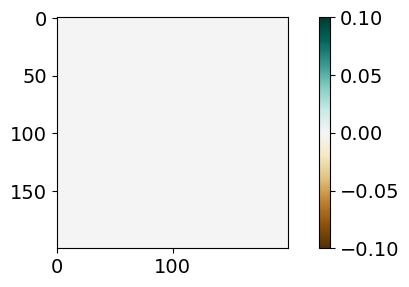

In [35]:
plt.figure()
plt.imshow(L_org.srm[50:250,50:250]-L_subset.srm, cmap='BrBG')
plt.colorbar()
plt.show()

## Rescale

By upscaling, then downscaling, we should return to the same map.

In [36]:
!$BUILD_DIR/edit_landmark -input output/Haworth_final_adj_5mpp_surf_tif_rendered.lmk -output output/Haworth_final_adj_5mpp_surf_tif_rendered_upsample.lmk -operation RESCALE -scale 0.5
!$BUILD_DIR/edit_landmark -input output/Haworth_final_adj_5mpp_surf_tif_rendered_upsample.lmk -output output/Haworth_final_adj_5mpp_surf_tif_rendered_downsample.lmk -operation RESCALE -scale 2

                 #! LVS Map v3.0
Landmark file written to: output/Haworth_final_adj_5mpp_surf_tif_rendered_upsample.lmk
                 #! LVS Map v3.0
Landmark file written to: output/Haworth_final_adj_5mpp_surf_tif_rendered_downsample.lmk


In [37]:
L_scale = landmark.Landmark("output/Haworth_final_adj_5mpp_surf_tif_rendered_downsample.lmk")

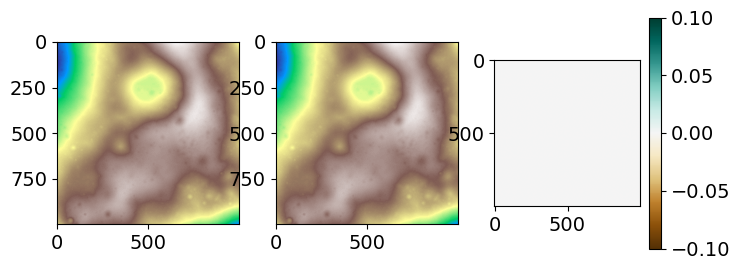

In [38]:
ax = plt.subplot(1,3,1)

# Display the image
ax.imshow(L_org.ele , cmap='terrain')

plt.subplot(1,3,2)
plt.imshow(L_scale.ele, cmap='terrain')

plt.subplot(1,3,3)
plt.imshow(L_org.ele-L_scale.ele, cmap='BrBG')
plt.colorbar()

plt.show()

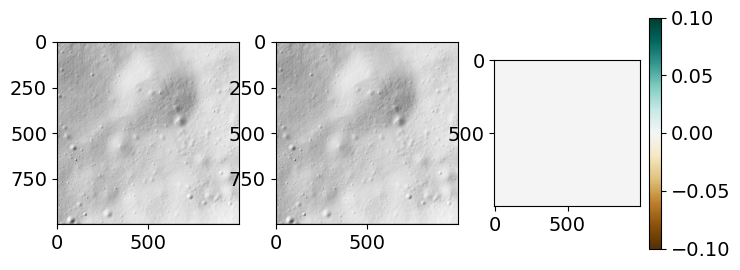

In [39]:
ax = plt.subplot(1,3,1)

# Display the image
ax.imshow(L_org.srm , cmap='gray')

plt.subplot(1,3,2)
plt.imshow(L_scale.srm, cmap='gray')

plt.subplot(1,3,3)
plt.imshow(L_org.srm-L_scale.srm, cmap='BrBG')
plt.colorbar()

plt.show()

## PLY

In [40]:
!$BUILD_DIR/landmark_2_point -landmark output/Haworth_final_adj_5mpp_surf_tif_rendered.lmk -ply output/ply_pointcloud_ascii.ply -filetype PLY_ASCII -structure POINTCLOUD
!$BUILD_DIR/point_2_landmark -p output/ply_pointcloud_ascii.ply -l output/ply_pointcloud_ascii.lmk -d 10 -lt 338.0 -lg -86.8  -s 10000 -sy 10000 -planet Moon -filetype PLY

Defaulting to WORLD
                 #! LVS Map v3.0
Landmark file saved at output/ply_pointcloud_ascii.ply
Defaulting to WORLD
 0.998440767155114  0.055821451814761  0.000000000000000
 0.020911083903056 -0.374022494511958  0.927183854566640
 0.051756748861116 -0.925738159047351 -0.374606593416277
Landmark file saved at output/ply_pointcloud_ascii.lmk


In [41]:
L_ply = landmark.Landmark("output/ply_pointcloud_ascii.lmk")
L_gt = landmark.Landmark("output/Haworth_final_adj_5mpp_surf_tif_rendered.lmk")

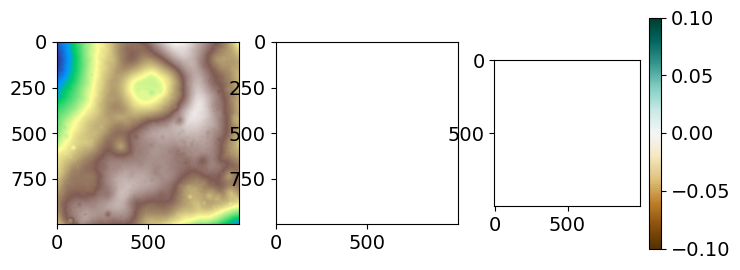

In [42]:
ax = plt.subplot(1,3,1)

# Display the image
ax.imshow(L_gt.ele , cmap='terrain')

plt.subplot(1,3,2)
plt.imshow(L_ply.ele, cmap='terrain')

plt.subplot(1,3,3)
plt.imshow(L_gt.ele-(L_ply.ele-L_ply.ele[250,250]), cmap='BrBG')
plt.colorbar()

plt.show()

In [43]:
L_ply.assess_equality(L_gt)

self.anchor_point != other.anchor_point
self.mapRworld != other.mapRworld
self.srm != other.srm
self.ele != other.ele


In [44]:
!$BUILD_DIR/landmark_2_point -landmark output/Haworth_final_adj_5mpp_surf_tif_rendered.lmk -ply output/ply_pointcloud.ply -filetype PLY_LITTLE_ENDIAN -structure POINTCLOUD
!$BUILD_DIR/point_2_landmark -p output/ply_pointcloud.ply -l output/ply_pointcloud.lmk -d 10 -lt 338.0 -lg -86.8 -s 10000 -sy 10000 -planet Moon -filetype PLY

Defaulting to WORLD
                 #! LVS Map v3.0
Landmark file saved at output/ply_pointcloud.ply
Defaulting to WORLD
 0.998440767155114  0.055821451814761  0.000000000000000
 0.020911083903056 -0.374022494511958  0.927183854566640
 0.051756748861116 -0.925738159047351 -0.374606593416277
Landmark file saved at output/ply_pointcloud.lmk


In [45]:
L_ply = landmark.Landmark("output/ply_pointcloud.lmk")
L_gt = landmark.Landmark("output/Haworth_final_adj_5mpp_surf_tif_rendered.lmk")

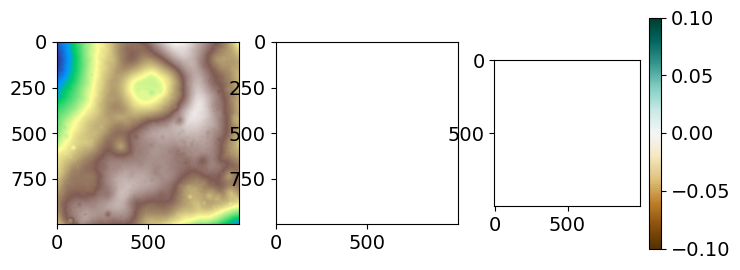

In [46]:
ax = plt.subplot(1,3,1)

# Display the image
ax.imshow(L_gt.ele , cmap='terrain')

plt.subplot(1,3,2)
plt.imshow(L_ply.ele, cmap='terrain')

plt.subplot(1,3,3)
plt.imshow(L_gt.ele-(L_ply.ele-L_ply.ele[250,250]), cmap='BrBG')
plt.colorbar()

plt.show()

In [47]:
L_ply.assess_equality(L_gt)

self.anchor_point != other.anchor_point
self.mapRworld != other.mapRworld
self.srm != other.srm
self.ele != other.ele


In [48]:
!$BUILD_DIR/point_2_landmark

Convert point cloud to landmark format.
Usage for point_2_landmark:
------------------
  Required arguments:
    -p   <filename> - input point cloud file.
    -l   <filename> - output lmkfile
    -d   <float> - resolution in meters per pixel
    -lt   <float> - latitude of center anchor point
    -lg   <float> - longitude of center anchor point
    -ele   <float> - elevation of center anchor point in meters
    -s   <float> - map width in meters
    -sy   <float> - map height in meters
    -planet <Moon|Earth|Mars> - (default Moon)
    -filetype <POINT|PLY> - file format of input file (default POINT)
    -frame <WORLD|LOCAL|RASTER> - reference frame of the input pointcloud (default WORLD)


In [49]:
!$BUILD_DIR/landmark_2_point

Write a landmark to a ply mesh or pointcloud.
Usage for landmark_2_point:
------------------
  Required arguments:
    -landmark   <filename> - input lmkfile
    -ply  <filename> - output PLY filepath
  Optional arguments:
    -filetype <PLY_ASCII|PLY_LITTLE_ENDIAN|PLY_BIG_ENDIAN> - (default arch endian)
    -structure <POINTCLOUD|MESH> - (default MESH)
    -frame <WORLD|LOCAL|RASTER> - (default WORLD)
